In [36]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statistics

In [40]:
dev_records = dict()

with open("./preprocessed/dev_records.csv", "r") as f:
    line = list(f.readlines())
    
    header = list(line[0][:-1].split(","))

    for i in range(1,len(line)):
        data = line[i][:-1].split(",")
        
        if i%2 == 1:
            method = data[0]
            loss = data[1:-1]
            test_acc = data[-1]
            
            dev_records[method] = dict()
            dev_records[method]["Loss"] = loss
            #dev_records[method]["Test Accuracy"] = test_acc
            
        else:
            method = line[i-1][:-1].split(",")[0]
            acc = data[1:-1]
            dev_records[method]["Accuracy"] = acc

In [4]:
dropout = []
reg = []
adamw = ['AdamW 1e^-5 (L2 0.0001 | Dropout 0.3)', 'L2 0.0001 (Dropout 0.3)', 'AdamW 3e^-5 (L2 0.0001 | Dropout 0.3)']

for i in dev_records:
    if i.startswith("Dropout"):
        dropout.append(i)
    if (i.startswith("L2") and i.endswith("0.3)")) or (i.startswith("L1") and i.endswith("0.3)")) :
        reg.append(i)

data = [dropout, reg, adamw]

In [5]:
dropout = []
reg = []
adamw = ['1e^-5', '2e^-5', '3e^-5']

for i in dev_records:
    if i.startswith("Dropout"):
        dropout.append(i.split(" ")[1])
    if (i.startswith("L2") and i.endswith("0.3)")) or (i.startswith("L1") and i.endswith("0.3)")) :
        method = i.split(" ")[0] + " (" + i.split(" ")[1] + ")"
        reg.append(method)
        
legend = [dropout, reg, adamw]

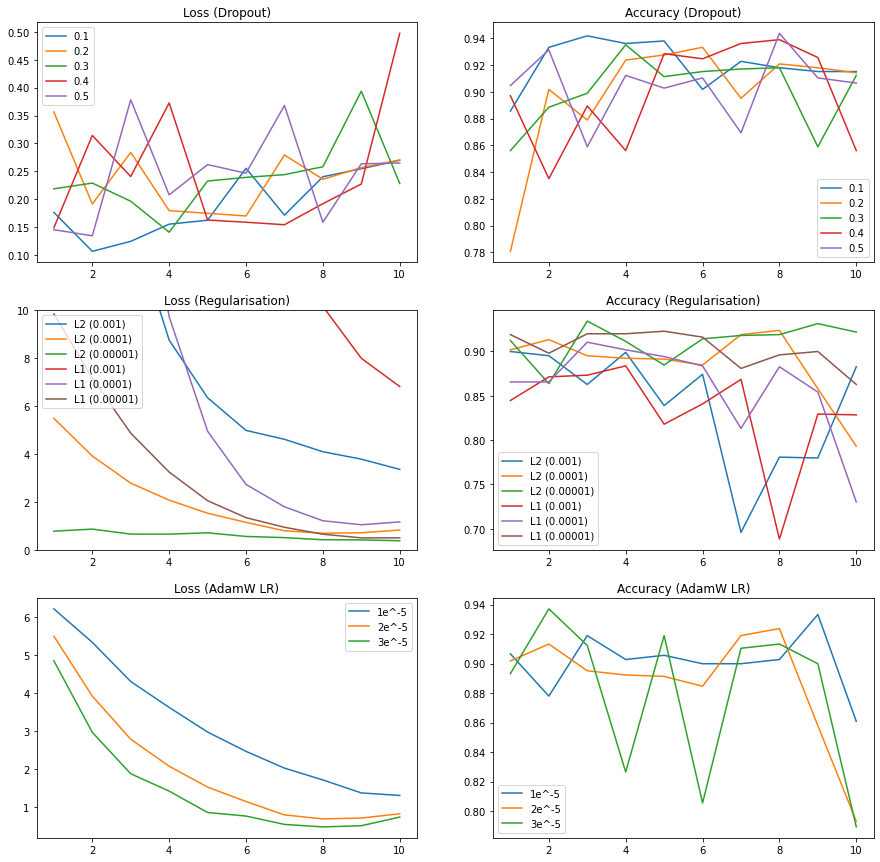

In [25]:
fig, axes = plt.pyplot.subplots(ncols = 2, nrows = 3)
fig.set_figheight(15)
fig.set_figwidth(15)
indexes = ['Loss (Dropout)', 'Accuracy (Dropout)', 'Loss (Regularisation)', 'Accuracy (Regularisation)', 'Loss (AdamW LR)', 'Accuracy (AdamW LR)']
epoch = [1,2,3,4,5,6,7,8,9,10]
count = 0

for i, ax in zip(range(7), axes.flat):
    if indexes[i].startswith("Accuracy"):
        ref = 'Accuracy'
    else:
        ref = 'Loss'
        
    if count < 2:
        index = 0
    elif ((count >= 2) and (count < 4)):
        index = 1
    else:
        index = 2
    
    params = data[index]
    
    for j in params:
        points = dev_records[j][ref]
        float_points = []
        
        for point in points:
            float_points.append(float(point))
        
        ax.plot(epoch, float_points)
        
    if count == 2:
        ax.set_ylim(bottom=0, top=10)
    
    ax.legend(legend[index], loc = "best") 
    #ax.axes.yaxis.set_visible(False)
    ax.set_title(indexes[i])
    
    count += 1
    
plt.pyplot.savefig('../dev_records.png')
plt.pyplot.show()

In [38]:
# ideal model
ideal_loss = []
ideal_accs = []

for i in dev_records[data[2][1]]['Loss']:
    ideal_loss.append(float(i))
for i in dev_records[data[2][1]]['Accuracy']:
    ideal_accs.append(float(i))

print("Average Loss:", statistics.mean(ideal_loss))
print("Average Accuracy:", statistics.mean(ideal_accs))

Average Loss: 2.0018194434987273
Average Accuracy: 0.8872259294566254
